## Importing Libraries

In [115]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Read data

In [116]:
data = pd.read_csv("/workspaces/Elevvo_Internship_Tasks/Data/loan_approval_dataset.csv")
data.head(10)


loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   
5      13500000          10           319                    6800000   
6      33000000           4           678                   22500000   
7      15000000          20           382                   13200000   
8       2200000          20           782                    1300000   
9       4300000          10           388                    3200000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   
5                   8300000              13700000            5100000   
6                  14800000              29200000            4300000   
7                   5700000              11800000            6000000   
8                    800000               2800000             600000   
9                   1400000               3300000            1600000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected  
5     Rejected  
6     Approved  
7     Rejected  
8     Approved  
9     Rejected

In [117]:
# Removing load_id since it does provide useful information
data = data.drop('loan_id', axis=1)
data.head(3)

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected

In [118]:
# make all column names lowercase and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(" ", "_")

print(data.columns)  # now you’ll see: ['loan_status', 'education', ...]

Index(['_no_of_dependents', '_education', '_self_employed', '_income_annum',
       '_loan_amount', '_loan_term', '_cibil_score',
       '_residential_assets_value', '_commercial_assets_value',
       '_luxury_assets_value', '_bank_asset_value', '_loan_status'],
      dtype='object')


In [119]:
#Checking datatypes of columns
data.dtypes

_no_of_dependents             int64
_education                   object
_self_employed               object
_income_annum                 int64
_loan_amount                  int64
_loan_term                    int64
_cibil_score                  int64
_residential_assets_value     int64
_commercial_assets_value      int64
_luxury_assets_value          int64
_bank_asset_value             int64
_loan_status                 object
dtype: object

In [120]:
#checking for missing or null values
#data.isna().sum()
print("\n🔍 Number of Missing values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")


🔍 Number of Missing values:
No missing values found!


In [121]:
#checking the shape of the data
data.shape

(4269, 12)

In [122]:
# Descriptive statistics of our dataset
data.describe()

_no_of_dependents  _income_annum  _loan_amount   _loan_term  \
count        4269.000000   4.269000e+03  4.269000e+03  4269.000000   
mean            2.498712   5.059124e+06  1.513345e+07    10.900445   
std             1.695910   2.806840e+06  9.043363e+06     5.709187   
min             0.000000   2.000000e+05  3.000000e+05     2.000000   
25%             1.000000   2.700000e+06  7.700000e+06     6.000000   
50%             3.000000   5.100000e+06  1.450000e+07    10.000000   
75%             4.000000   7.500000e+06  2.150000e+07    16.000000   
max             5.000000   9.900000e+06  3.950000e+07    20.000000   

       _cibil_score  _residential_assets_value  _commercial_assets_value  \
count   4269.000000               4.269000e+03              4.269000e+03   
mean     599.936051               7.472617e+06              4.973155e+06   
std      172.430401               6.503637e+06              4.388966e+06   
min      300.000000              -1.000000e+05              0.000000e+00   
25%      453.000000               2.200000e+06              1.300000e+06   
50%      600.000000               5.600000e+06              3.700000e+06   
75%      748.000000               1.130000e+07              7.600000e+06   
max      900.000000               2.910000e+07              1.940000e+07   

       _luxury_assets_value  _bank_asset_value  
count          4.269000e+03       4.269000e+03  
mean           1.512631e+07       4.976692e+06  
std            9.103754e+06       3.250185e+06  
min            3.000000e+05       0.000000e+00  
25%            7.500000e+06       2.300000e+06  
50%            1.460000e+07       4.600000e+06  
75%            2.170000e+07       7.100000e+06  
max            3.920000e+07       1.470000e+07

## Data Exploration and Visualization

In [123]:
# Loan status distribution
fig_loan_status= px.histogram(data,x='_loan_status',title='Loan Status Distribution')
fig_loan_status.show()

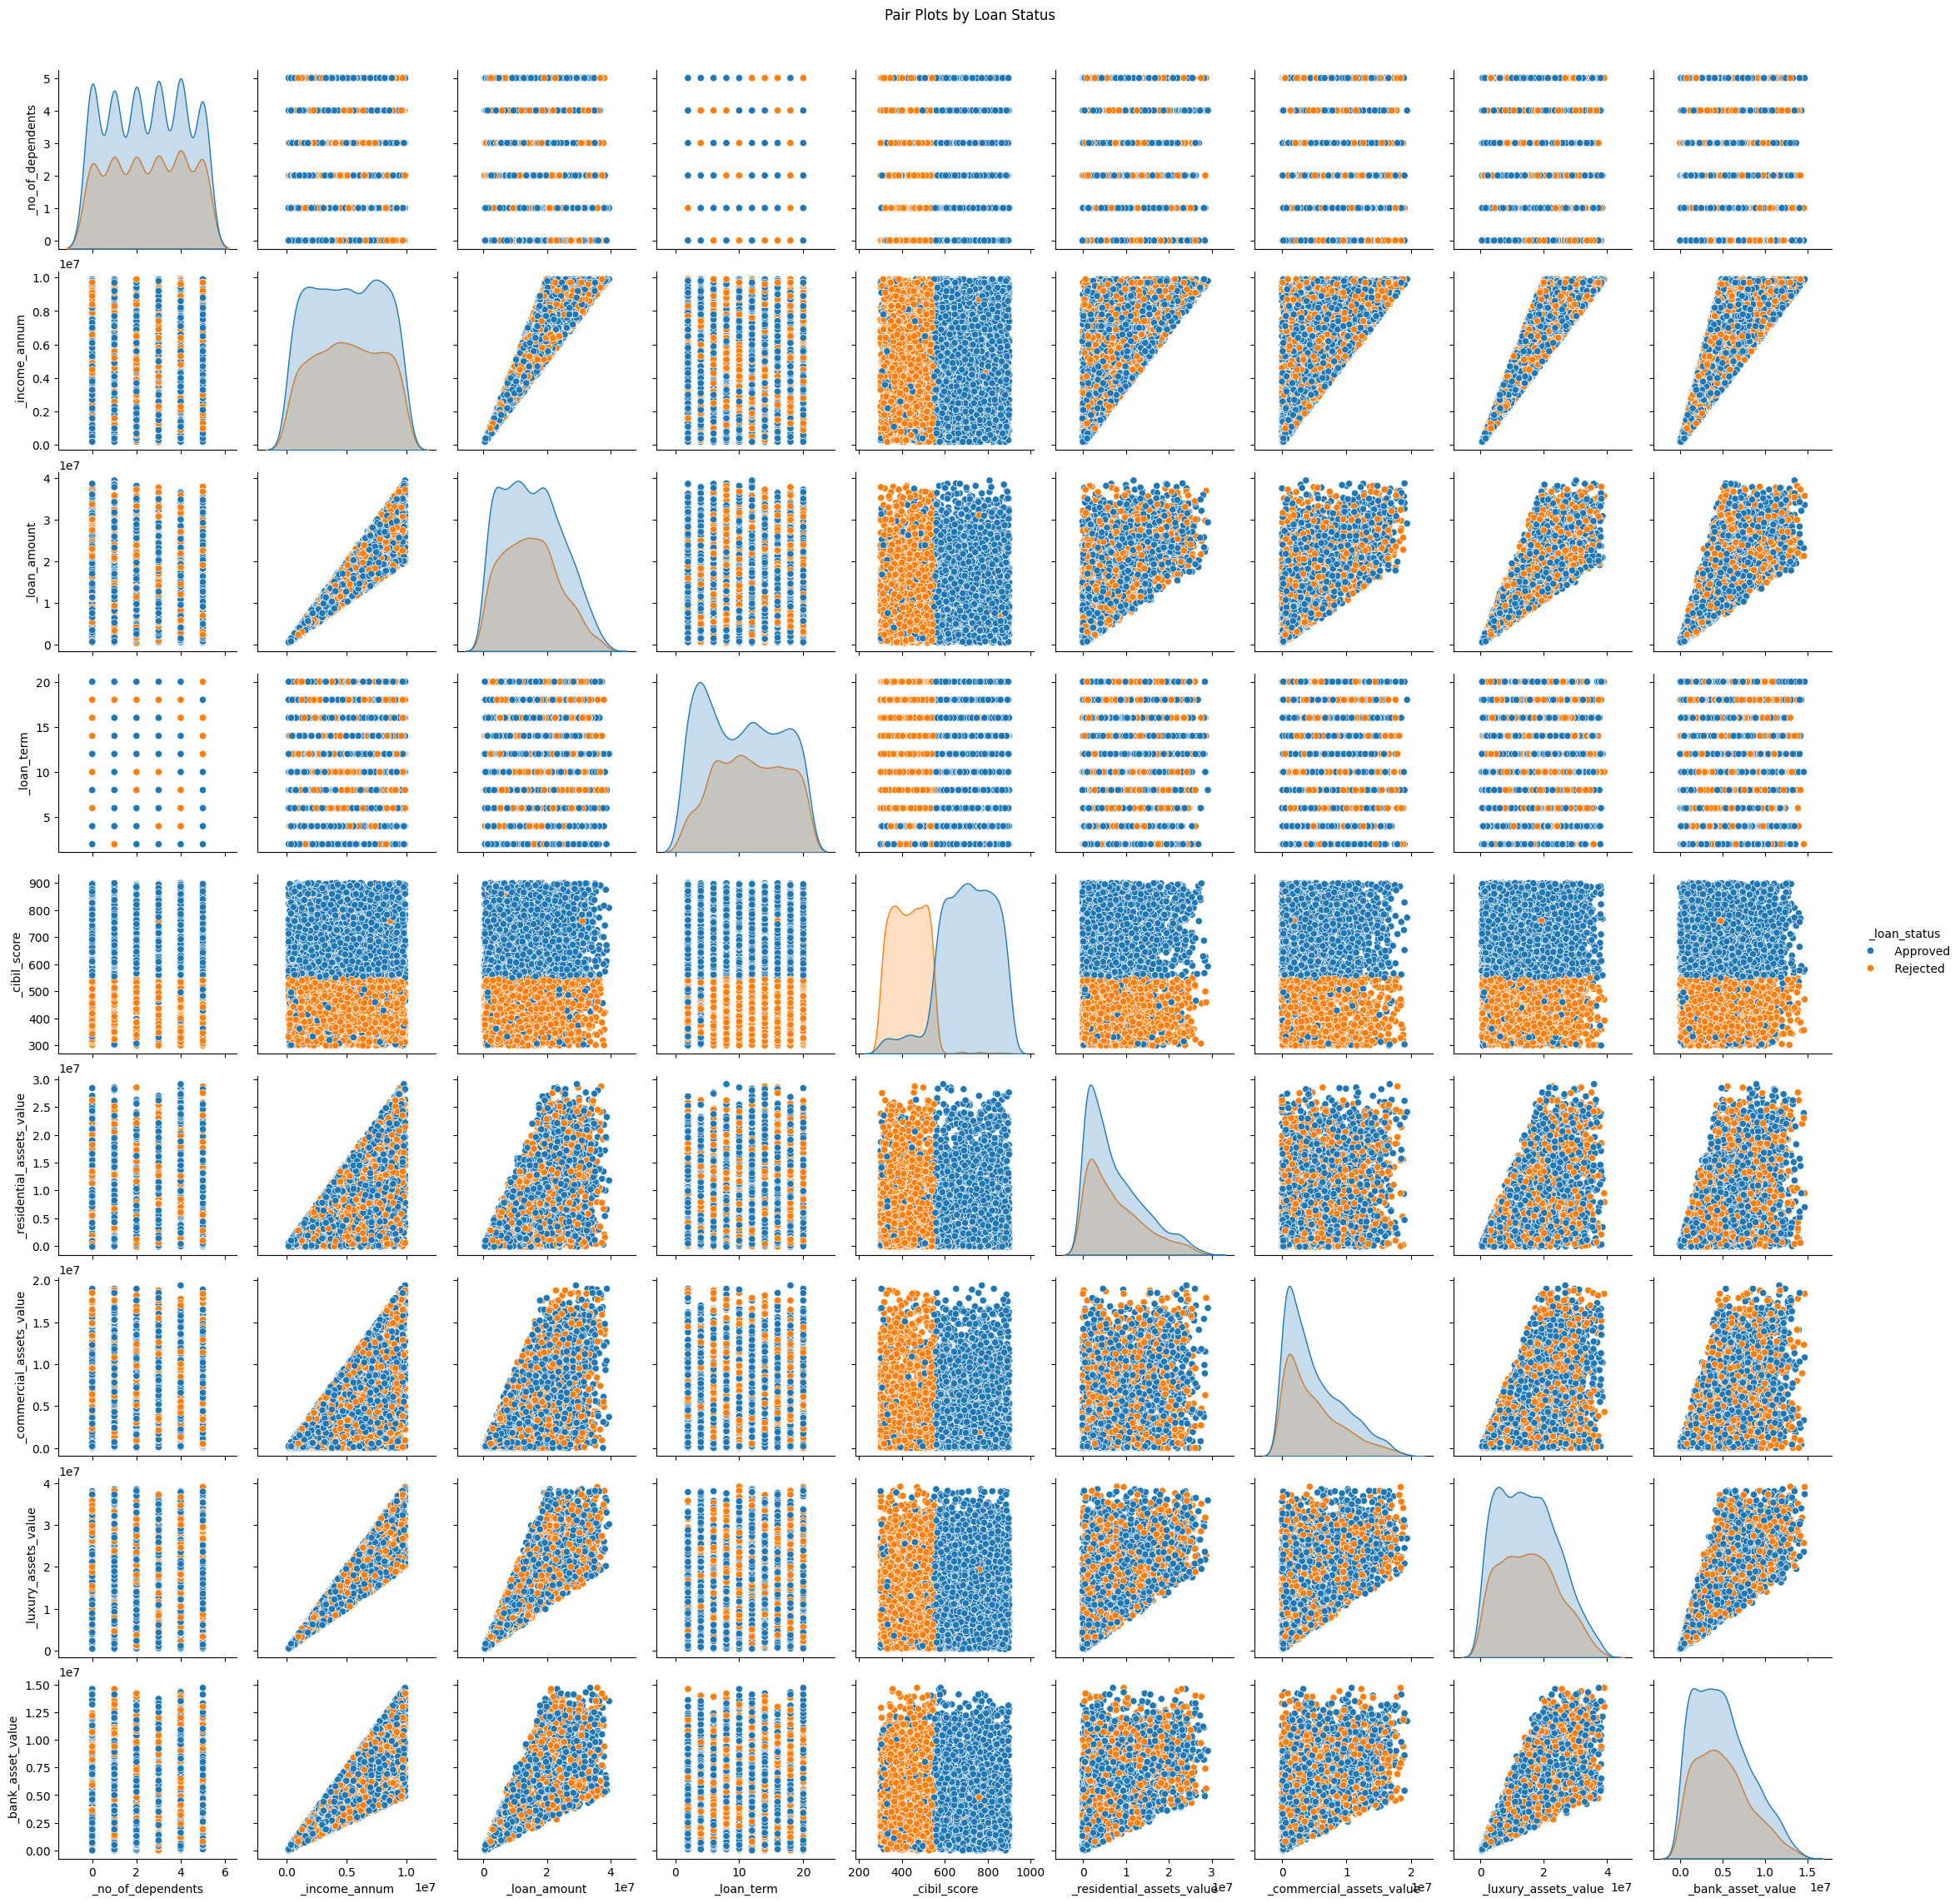

In [124]:
# Pair Plots by Loan Status

sns.pairplot(data, hue='_loan_status')
plt.suptitle('Pair Plots by Loan Status', y=1.02)
plt.show()

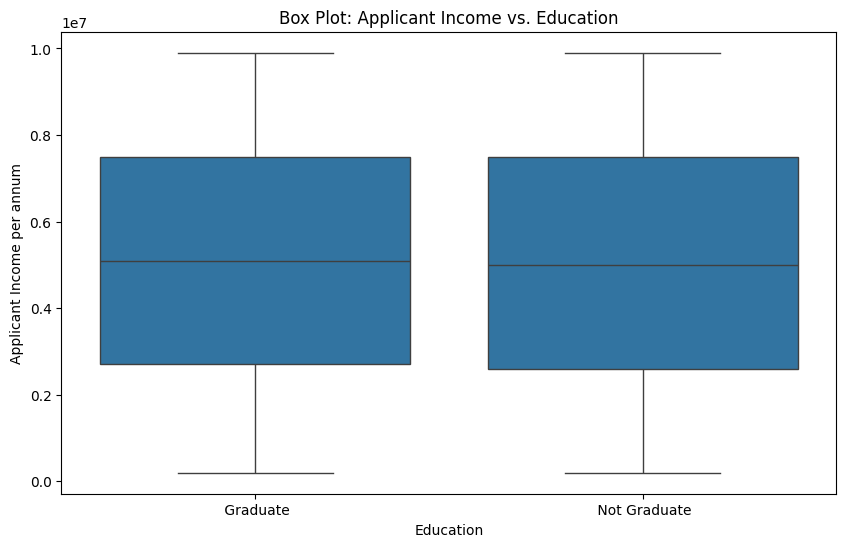

In [125]:
# Applicant Income vs. Education

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='_education', y='_income_annum')
plt.ylabel('Applicant Income per annum')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.show()

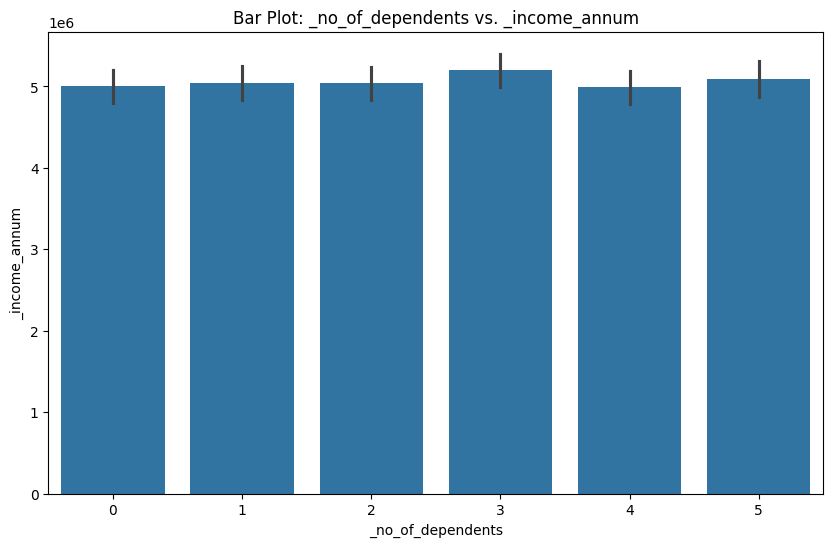

In [126]:
# Number of independents vs Income per annum

plt.figure(figsize=(10,6))
sns.barplot(data, x='_no_of_dependents', y='_income_annum')
plt.xlabel('_no_of_dependents')
plt.ylabel('_income_annum')
plt.title('Bar Plot: _no_of_dependents vs. _income_annum')
plt.show()

## Data Preparation

In [128]:
#Convert categorical Columns into numerical ones
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_to_encode = ['_education', '_self_employed', '_loan_status']
for i in col_to_encode:
    data[i] = le.fit_transform(data[i])


In [129]:
data.head()

_no_of_dependents  _education  _self_employed  _income_annum  _loan_amount  \
0                  2           0               0        9600000      29900000   
1                  0           1               1        4100000      12200000   
2                  3           0               0        9100000      29700000   
3                  3           0               0        8200000      30700000   
4                  5           1               1        9800000      24200000   

   _loan_term  _cibil_score  _residential_assets_value  \
0          12           778                    2400000   
1           8           417                    2700000   
2          20           506                    7100000   
3           8           467                   18200000   
4          20           382                   12400000   

   _commercial_assets_value  _luxury_assets_value  _bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   _loan_status  
0             0  
1             1  
2             1  
3             1  
4             1

In [130]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['_income_annum', '_loan_amount', '_residential_assets_value', '_commercial_assets_value', '_luxury_assets_value','_bank_asset_value']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data[numerical_cols] = scaler.transform(data[numerical_cols])

In [131]:
data.head()

_no_of_dependents  _education  _self_employed  _income_annum  _loan_amount  \
0                  2           0               0      -1.802638     -1.673628   
1                  0           1               1      -1.802638     -1.673628   
2                  3           0               0      -1.802638     -1.673628   
3                  3           0               0      -1.802638     -1.673628   
4                  5           1               1      -1.802638     -1.673628   

   _loan_term  _cibil_score  _residential_assets_value  \
0          12           778                  -1.149125   
1           8           417                  -1.149125   
2          20           506                  -1.149125   
3           8           467                  -1.149125   
4          20           382                  -1.149125   

   _commercial_assets_value  _luxury_assets_value  _bank_asset_value  \
0                 -1.133236             -1.661741          -1.531382   
1                 -1.133237             -1.661741          -1.531382   
2                 -1.133237             -1.661740          -1.531381   
3                 -1.133237             -1.661741          -1.531382   
4                 -1.133237             -1.661741          -1.531382   

   _loan_status  
0             0  
1             1  
2             1  
3             1  
4             1

In [133]:
# Split the dataset into features (X) and target (y)
X = data.drop('_loan_status', axis=1)
y = data['_loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("\n")

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC:")
print("Accuracy: ", accuracy_svc)
print("\nClassification Report: ", classification_report_svc)
print("\nConfusion Matrix: \n", confusion_matrix_svc)



Logistic Regression:
Accuracy: 0.9133489461358314
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       536
           1       0.88      0.88      0.88       318

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
 [[499  37]
 [ 37 281]]



Random Forest Classifier:
Accuracy: 0.9718969555035128
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.98      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Confusion Matrix:
 [[529   7]
 [ 17 301]]



SVC:
Accuracy:  0.9543325526932084

Classification Report:                precision    recall  f1-scor

In [140]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: _loan_status
0    2120
1    1295
Name: count, dtype: int64
After SMOTE: _loan_status
0    2120
1    2120
Name: count, dtype: int64


In [ ]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_res, y_train_res)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("\n")



svc_model = SVC(random_state=42)
svc_model.fit(X_train_res, y_train_res)
y_pred = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_svc)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_svc)
print("Classification Report:\n", classification_report_svc)
print("Confusion Matrix:\n", confusion_matrix_svc)
print("\n")



Logistic Regression:
Accuracy: 0.9156908665105387
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       536
           1       0.86      0.93      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.91       854
weighted avg       0.92      0.92      0.92       854

Confusion Matrix:
 [[486  50]
 [ 22 296]]



Logistic Regression:
Accuracy: 0.9718969555035128
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.98      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Confusion Matrix:
 [[529   7]
 [ 17 301]]



Logistic Regression:
Accuracy: 0.9543325526932084
Classification Report:
               precision    recall

## Hyperparameter tuning

In [135]:
from sklearn.model_selection import GridSearchCV

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_reg_grid = GridSearchCV(log_reg_model, param_grid=log_reg_params, cv=3)

log_reg_grid.fit(X_train, y_train)

log_reg_best = log_reg_grid.best_estimator_

y_pred_log_reg = log_reg_best.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression:")
print(f"Best parameters: {log_reg_grid.best_params_}")
print(f"Best Cross-Validation Score: {log_reg_grid.best_score_}")
print(f"Accuracy: {accuracy_log_reg}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.92006009444147
Accuracy: 0.9133489461358314
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       536
           1       0.88      0.88      0.88       318

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
[[499  37]
 [ 37 281]]
